In [12]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert string representation of list to actual list

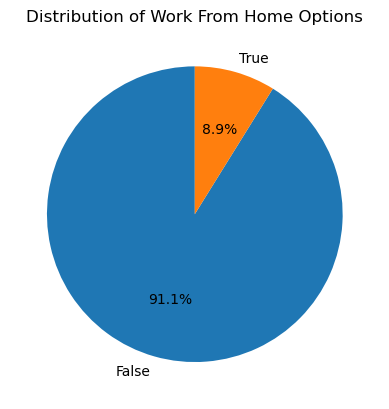

In [13]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct = '%1.1f%%') # Check the unique values in the 'work_from_home' column
plt.title('Distribution of Work From Home Options') # Add a title to the pie chart
plt.ylabel('') # Remove y-axis label for better aesthetics  
plt.show() # Display the pie chart

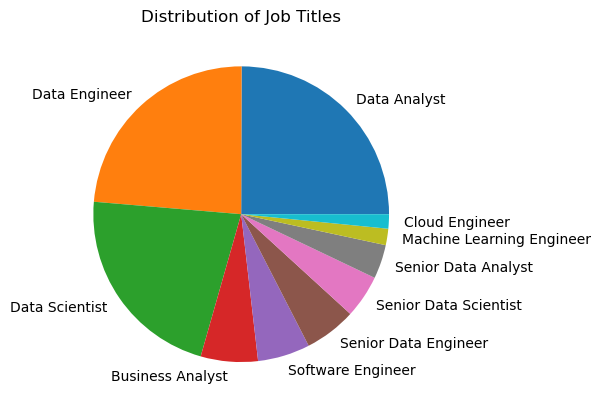

In [14]:
df['job_title_short'].value_counts().plot(kind='pie') # Check the unique values in the 'job_title_short' column
plt.title('Distribution of Job Titles') # Add a title to the pie chart
plt.ylabel('') # Remove y-axis label for better aesthetics  
plt.show() # Display the pie chart   

Text(0.5, 1.0, 'Distribution of Job Titles')

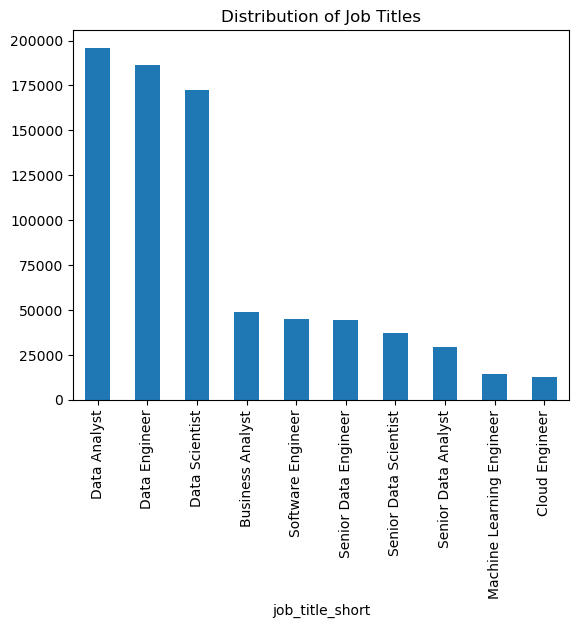

In [15]:
# If we use pie chart for job titles, it will be too cluttered. Instead, we can use a bar chart to show the distribution of job titles.
df['job_title_short'].value_counts().plot(kind='bar') # Plot the distribution of job titles using a bar chart
plt.title('Distribution of Job Titles') # Add a title to the bar chart   

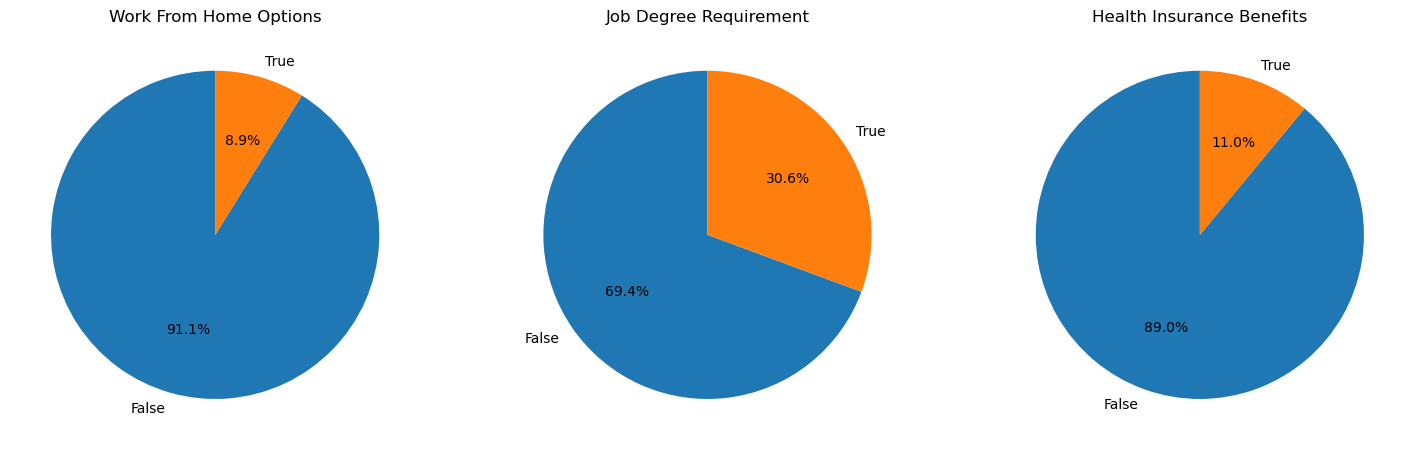

In [16]:
from sqlalchemy import column


fig, ax = plt.subplots(1, 3, figsize=(18, 6)) # Create a figure with 1 row and 3 columns of subplots

dict_column = {
    'job_work_from_home': 'Work From Home Options',
    'job_no_degree_mention': 'Job Degree Requirement',
    'job_health_insurance': 'Health Insurance Benefits',
}

for i, (column_name, column_label) in enumerate(dict_column.items()):
    ax[i].pie(df[column_name].value_counts(), labels=df[column_name].value_counts().index, autopct='%1.1f%%', startangle=90) # Create a pie chart for each column in the dictionary
    ax[i].set_title(column_label) # Set the title for each subplot